

# Exploring Global Trends of Human Advancement

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I chose to look at data from Gapminder.org that had to do with human advancement over time. This led me to look at CO2 emissions, life expectancy, human developement index (HDI), and the ratio of girls to boys in primary and secondary education. All of which were separated by country. 
>
> I investigated two questions. Has CO2 emissions had an effect on life expectancy? Does improving female education raise HDI?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.artist as art
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Read in all 4 datasets
hdi = pd.read_csv('hdi_human_development_index.csv')
co2 = pd.read_csv('co2_tonnes_per_person.csv')
le = pd.read_csv('life_expectancy_years.csv')
gtb = pd.read_csv('girl_boy_ratio.csv')

### Filling in gaps and finding statistical information

In [3]:
co2.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,5.000000,5.000000,7.000000,5.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.523786,0.517832,0.659911,0.570422,0.489042,0.590578,0.611746,0.526380,0.599746,0.593316,...,4.584343,4.684943,4.624831,4.682812,4.597075,4.555427,4.456147,4.423509,4.446485,4.455041
std,1.093672,1.085826,1.065140,1.201775,1.083367,1.224113,1.279321,1.148889,1.252499,1.239320,...,6.117491,6.150072,6.059752,6.216025,5.927510,6.035925,5.813499,5.644049,5.652167,5.609198
min,0.007330,0.007160,0.006980,0.006810,0.006650,0.006490,0.006330,0.006180,0.006030,0.005880,...,0.022700,0.030400,0.036600,0.034200,0.041900,0.038300,0.036700,0.025400,0.024400,0.024300
25%,0.042200,0.029300,0.038150,0.028300,0.050025,0.051700,0.047300,0.043425,0.043800,0.044700,...,0.539250,0.599000,0.596750,0.622500,0.653750,0.659750,0.664750,0.681250,0.669750,0.669250
50%,0.044200,0.043800,0.049400,0.046800,0.052050,0.053400,0.049700,0.054600,0.052600,0.049200,...,2.360000,2.405000,2.370000,2.460000,2.455000,2.490000,2.480000,2.480000,2.505000,2.530000
75%,0.045200,0.048900,1.018350,0.050200,0.068625,0.061300,0.055400,0.113550,0.056300,0.056800,...,6.127500,6.432500,6.545000,6.565000,6.145000,6.040000,5.850000,6.047500,5.935000,5.925000
max,2.480000,2.460000,2.450000,2.720000,2.700000,2.780000,2.900000,2.870000,2.840000,2.810000,...,41.500000,38.800000,39.200000,42.500000,36.000000,43.100000,41.300000,38.500000,39.800000,38.000000


In [4]:
# forward fill empty spaces in the dataset.
ls = [hdi, co2, le, gtb]
for i in ls:
    i.fillna(method='ffill', inplace=True)

>Many countries had missing values interspersed throughout the datasets. To overcome this I used fillna to fill in the null values. I chose to use foreward fill because I was focusing on the years 1990 to 2018 as that is when HDI recording began, and after 2018 values are projected. CO2 emissions and life expectancy already had few null values dating back to 1800, so foreward filling did away with the nulls in those data sets.

In [5]:
# create description dataframes for each dataset.
hdi_d = hdi.describe().T
co2_d = co2.describe().T
le_d = le.describe().T
gtb_d = gtb.describe().T

>I decided to look at the global trends using the mean and quartiles, so I used describe then transpose to create statistical datasets for each category and orient them to more easily graph. 

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Has CO2 emissions had an effect on life expectancy?

Text(0, 0.5, 'count')

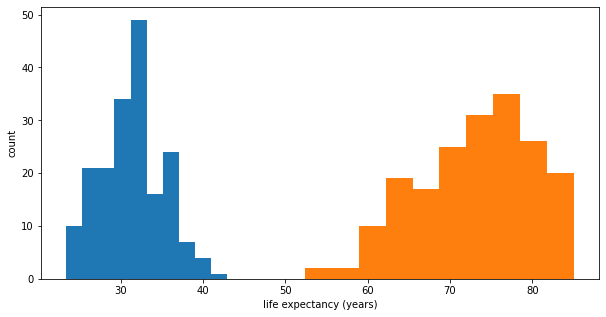

In [6]:
# create figure size
plt.figure(figsize=[10,5])
#Loop that produces histogram for 1800 and 2018 and plots them on the same axis
for val in ['1800', '2018']:
    plt.hist(le[val])
    
plt.xlabel('life expectancy (years)')
plt.ylabel('count')

The most stand out part of this graph is that there is no overlap of life expectancies between the two years. Secondly is that there is a more even distribution in 1800 over the 25 year spread, than 2018. Where there is a spread of around 30 years skewed to the left.

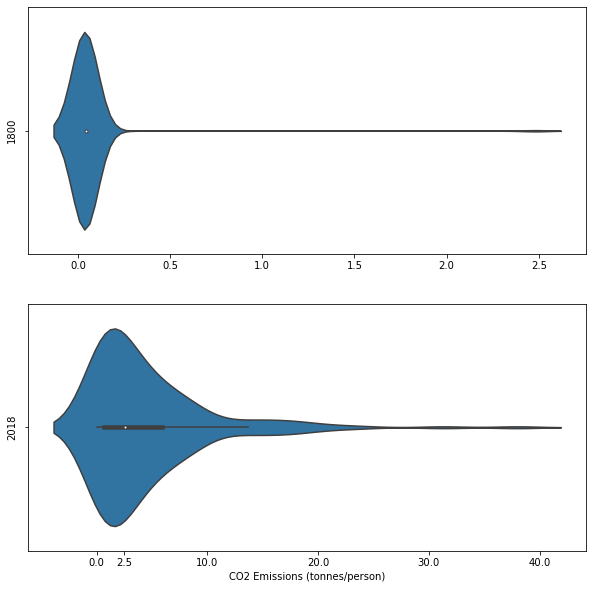

In [7]:
#create figure and size to put subplots on
plt.figure(figsize=[10, 10])

# Create first violin subplot of 1800 co2 emissions
plt.subplot(2,1,1)
sb.violinplot(data=co2, x = '1800')
plt.ylabel('1800')
plt.xlabel('')

# create second violin subplot of 2018 CO2 emissions 
plt.subplot(2,1,2)
ticks = [0, 2.5, 10, 20, 30, 40]
sb.violinplot(data=co2, x= '2018')
plt.ylabel('2018')
plt.xlabel('CO2 Emissions (tonnes/person)')
plt.xticks(ticks);

This shows the massive increase in CO2 consumption per person in the last 200 years. The most CO2 emissions in 1800 was 2.5 tonnes/person. Now, the majority of countries produce near as much as that, and many others producing volumes 10 to 20 times that.

In [8]:
# Create range of years to plot, and convert it to a string
y2 = np.arange(1800, 2018)
y2_string = [str(x) for x in y2]

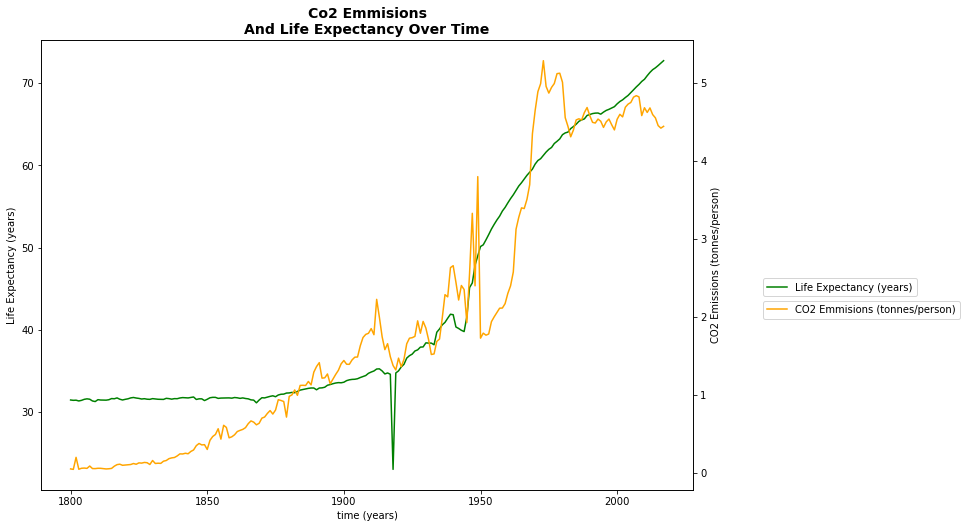

In [9]:
# create the main figure and call it ax_le
fig, ax_le = plt.subplots(figsize=[11.69, 8.27])

# plot life expectancy on ax_le axis
ax_le.plot(y2, le_d['mean'].loc[y2_string], color = 'green', label='Life Expectancy (years)')

# twin the x axis (allows for a new y axis)
ax_co2 = ax_le.twinx()
# plot co2 on new axis
ax_co2.plot(y2, co2_d['mean'].loc[y2_string], color='orange', label='CO2 Emmisions (tonnes/person)')

# set y labels on the two axes
ax_le.set_ylabel('Life Expectancy (years)')
ax_co2.set_ylabel('CO2 Emissions (tonnes/person)')

# set x label
ax_le.set_xlabel('time (years)')

# set legends (note they have a slightly different position)
ax_le.legend(loc='center left', bbox_to_anchor=(1.1, 0.45))
ax_co2.legend(loc='center left', bbox_to_anchor=(1.1, 0.4))

# other plot info
plt.title('CO2 Emmisions\nand Life Expectancy over Time'.title(), fontsize = 14, weight = 'bold');

There seems to be a relationship between LE and CO2 when the two are plotted together. CO2 has quite a bit of variability, but there is still an upwards correlation between the two. Towards the end life expecancy continues to climb, but CO2 emissions have leveled off. It could be a sign that fossil fuels are becoming less necessary.

### Question 2: Does improving female education raise HDI?

In [10]:
# create range of dates to plot, then convert them to a list of strings
y1 = np.arange(1990, 2018)
y1_string = [str(x) for x in y1]

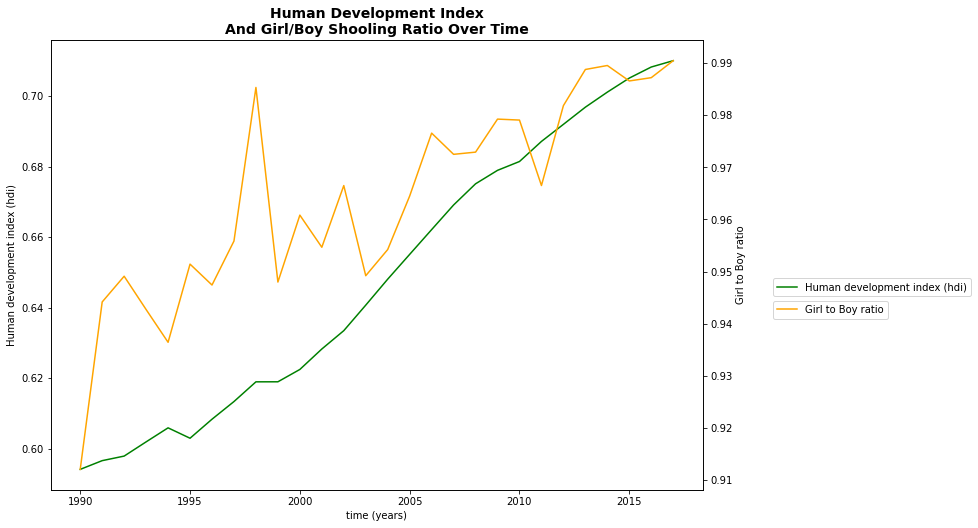

In [11]:
# create the main figure and call it ax_le
fig, ax_hdi = plt.subplots(figsize=[11.69, 8.27])

# plot life expectancy on ax_le axis
ax_hdi.plot(y1, hdi_d['mean'].loc[y1_string], color = 'green', label='Human development index (hdi)')

# twin the x axis (allows for a new y axis)
ax_gtb = ax_hdi.twinx()
# plot co2 on new axis
ax_gtb.plot(y1, gtb_d['mean'].loc[y1_string], color='orange', label='Girl to Boy ratio')

# set y labels on the two axes
ax_hdi.set_ylabel('Human development index (hdi)')
ax_gtb.set_ylabel('Girl to Boy ratio')

# set x label
ax_hdi.set_xlabel('time (years)')

# set legends (note they have a slightly different position)
ax_hdi.legend(loc='center left', bbox_to_anchor=(1.1, 0.45))
ax_gtb.legend(loc='center left', bbox_to_anchor=(1.1, 0.4))

# other plot info
plt.title('Human Development Index\nand Girl/Boy Shooling Ratio over Time'.title(), fontsize = 14, weight = 'bold');

There seems to be a correlation between HDI and Girl/Boy ratio. Girl/boy ratio seems to increase first then HDI follows. 

Text(0.5, 1.0, 'Human Development Index over Time')

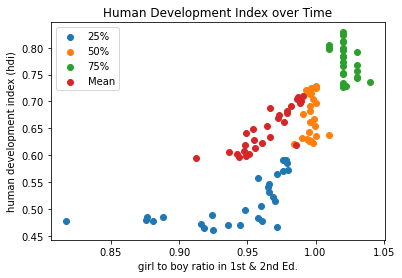

In [12]:
# plot each quartile for gtb and hdi including only previously determined range
plt.scatter(gtb_d['25%'].loc[y1_string], hdi_d['25%'][:-1], label='25%')
plt.scatter(gtb_d['50%'].loc[y1_string], hdi_d['50%'][:-1], label='50%')
plt.scatter(gtb_d['75%'].loc[y1_string], hdi_d['75%'][:-1], label='75%')
plt.scatter(gtb_d['mean'].loc[y1_string], hdi_d['mean'][:-1], label='Mean')
plt.legend()
plt.xlabel('girl to boy ratio in 1st & 2nd Ed.')
plt.ylabel('human development index (hdi)')
plt.title('Human Development Index over Time')

<a id='conclusions'></a>
## Conclusions

> **Question 1**: There seems to be a relationship between CO2 emissions and life expectancy. I began by exploring the distribution of life expectancy in 1800 (when they were first recorded) and 2018 (the most recent year). It is quite obvious that there has been a massive shift. Even the highest life expectancy in 1800 is ten years younger than the lowest life expectancy in 2018. I think this can be partially explained by our increased use of CO2. When I created similar bar charts for CO2 emissions, the 1800's emissions levels were so low that they could not be seen on the plot. I instead made 2 violin plots to show the difference. Even just looking at relative distribution it you can see that in 1800 thre was a much greater concentration on the lower end of the emissions spectrum. I placed a tick at 2.5 on the 2018 plot to show were the highest emissions per person country compared to today. Because they both saw such extreme changes in both emissions and life expectancy, I plotted them over time on the same graph. Here, the relationahip really stands out. Especially in the 20th century. Recently, the CO2 emissions levels seem to be leveling off, while life expectancy continues to climb. I would guess that while fossil fuels have played a role in extending the average life, it is becomeing less necessary. Lastly, since this is only CO2 emissions per person an increase in population may look like a decrease in emissions, but it might not be an over all decrease in emissions.   

> **Question 2**: I began by plotting the mean Human Developemint Index (HDI) with the mean ratio of girls to boys in 1st and 2nd Education. There seems to be a consistant upwards trend for both, with girl/boy ratios varying much more than HDI. I then created a scatter plot, and devided each variable into four groups based on the separations between each quartile and the mean. When graphed, there seems to be a linear relationship between the variables for the mean, but a logrithmic relationship when looking at the dataset as a whole. It could mean that increasing the ratio results in a higher HDI, but there may also be other factors that raise HDI and make school more accessable by girls. It also appears that past a one to one ratio HDI is not affected.

> **Limitations**: One of the main limitations is no statistical analysis. While I think I have identified trend in the data, the correlations have no statistical proof to support my findings. 
